## Import Libraires

In [111]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings("ignore")

## Exploring the data and providing descriptive statistics.

In [6]:
# Load the train and test datasets
train_data = pd.read_csv('C:/Users/Mustafa Abdulnasser/Desktop/Mobile_price_prediction/data/train.csv')
test_data = pd.read_csv('C:/Users/Mustafa Abdulnasser/Desktop/Mobile_price_prediction/data/test.csv')

In [7]:
# Display the first few rows of the train dataset
train_data.head()  

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
# Display the first few rows of the test dataset
test_data.head()  

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [9]:
# Get information about the train dataset, such as column names and data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# Get information about the test dataset, such as column names and data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
# Get the number of rows and columns in the train dataset
train_data.shape

(2000, 21)

In [12]:
# Get the number of rows and columns in the test dataset
test_data.shape

(1000, 21)

In [13]:
# Summary statistics for the train dataset
train_summary_stats = train_data.describe()
print("Train dataset summary statistics:")
train_summary_stats

Train dataset summary statistics:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
# Summary statistics for the test dataset
test_summary_stats = test_data.describe()
print("Test dataset summary statistics:")
test_summary_stats

Test dataset summary statistics:


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [15]:
# Calculate the frequency of the target column
train_target_freq = train_data['price_range'].value_counts()

# Display the frequency counts
print("Train dataset target frequency counts:")
print(train_target_freq)

Train dataset target frequency counts:
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


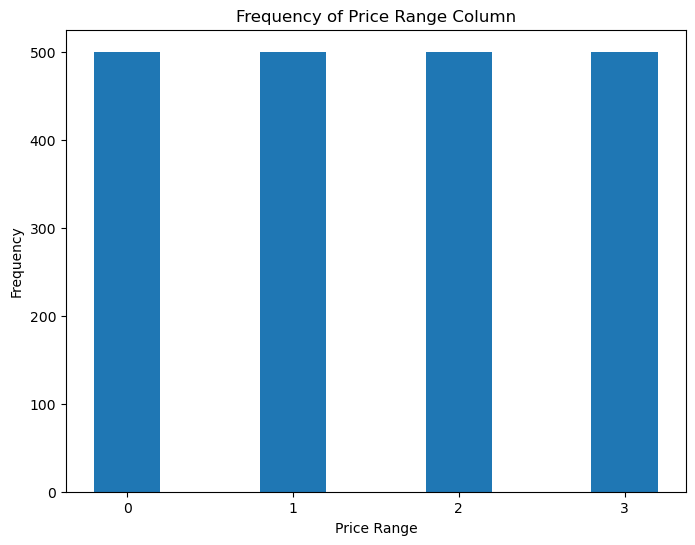

In [16]:
# Create a figure and axes with a smaller size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as per your preference

# Plot the histogram
ax.bar(train_target_freq.index, train_target_freq.values, width=0.4)

# Add labels and title
ax.set_xlabel('Price Range')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Price Range Column')

# Set x-axis ticks to display only index values
ax.set_xticks(train_target_freq.index)

# Display the plot
plt.show()

### Here we found that there is no imbalance in our trainset

<AxesSubplot:xlabel='talk_time'>

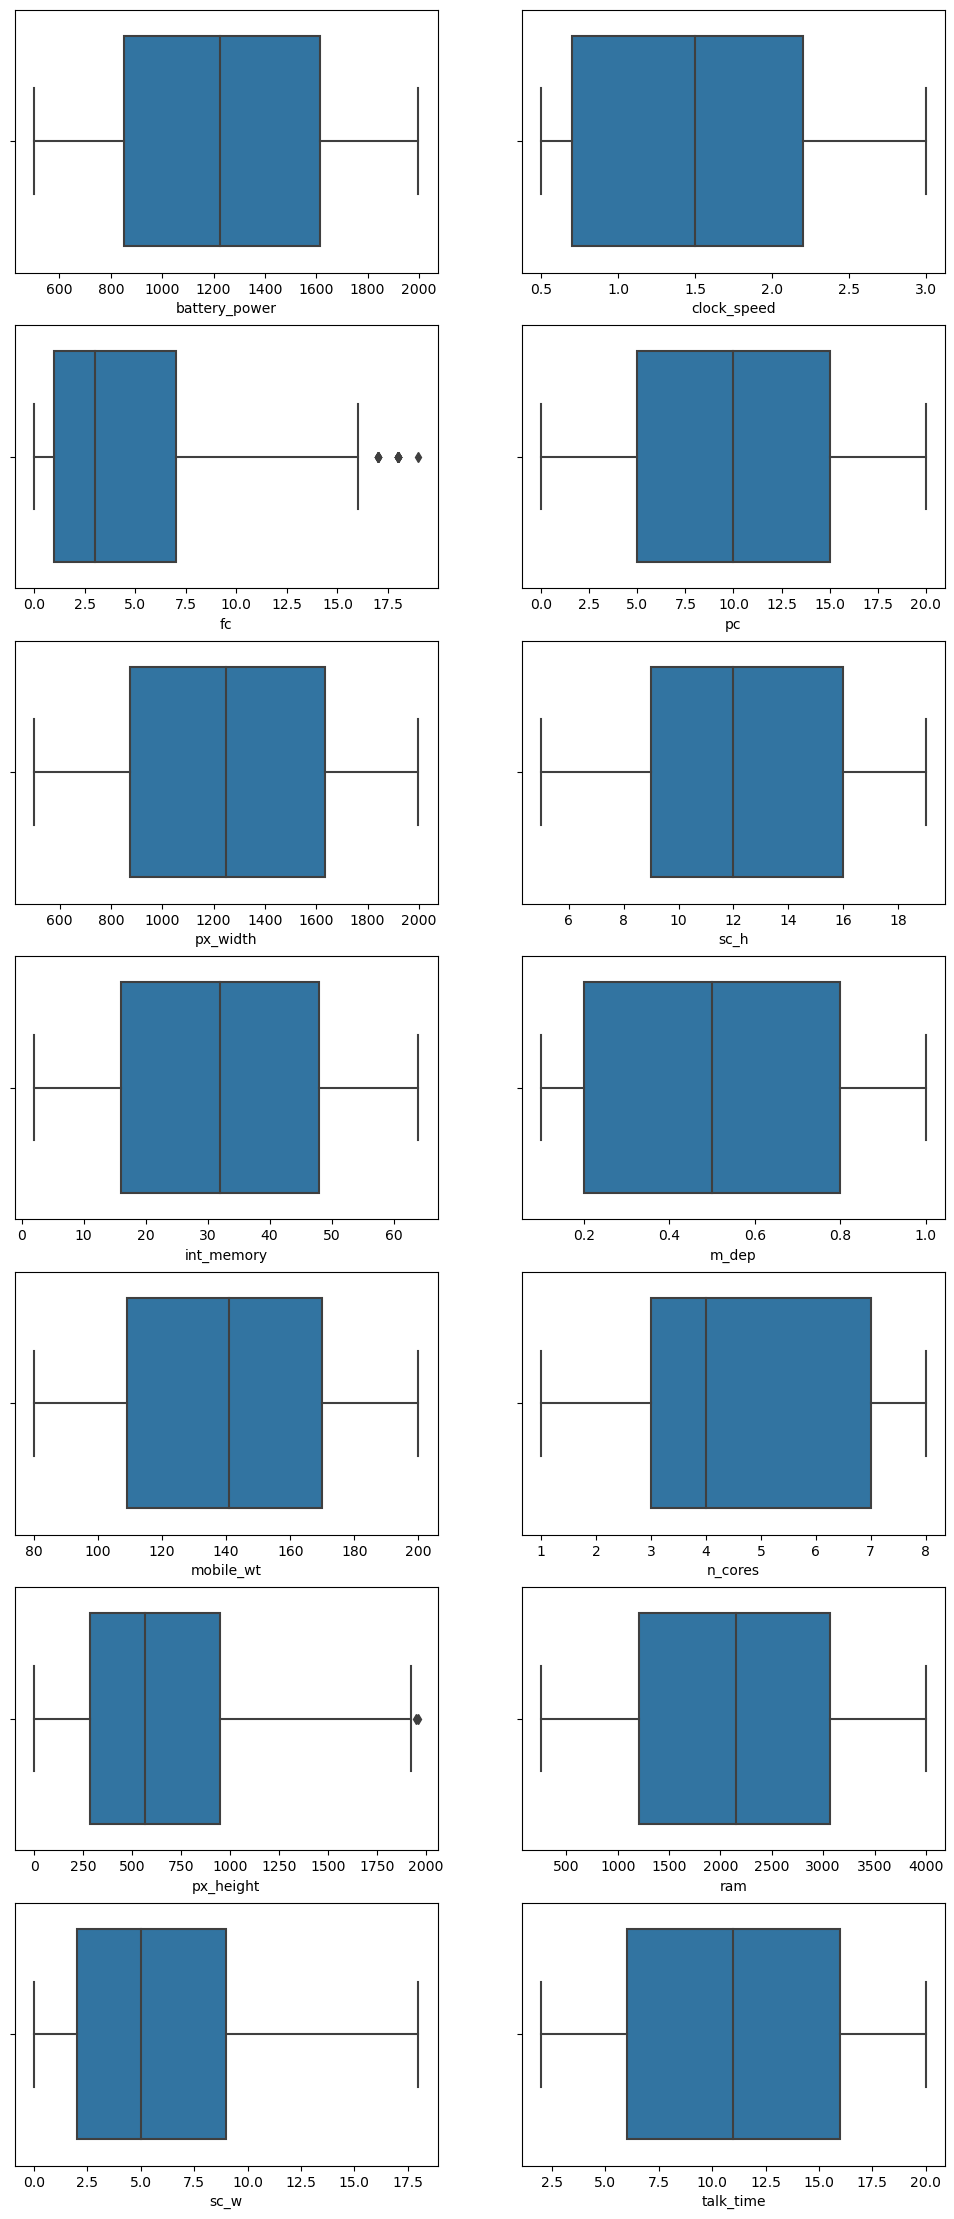

In [17]:
# Outlier Analysis of Non-Categorical Data

fig, ax = plt.subplots(ncols=2, nrows=7, figsize=(12,28))
sns.boxplot(x=train_data['battery_power'],ax=ax[0,0])
sns.boxplot(x=train_data['clock_speed'],ax=ax[0,1])
sns.boxplot(x=train_data['fc'],ax=ax[1,0])
sns.boxplot(x=train_data['pc'],ax=ax[1,1])
sns.boxplot(x=train_data['px_width'],ax=ax[2,0])
sns.boxplot(x=train_data['sc_h'],ax=ax[2,1])
sns.boxplot(x=train_data['int_memory'],ax=ax[3,0])
sns.boxplot(x=train_data['m_dep'],ax=ax[3,1])
sns.boxplot(x=train_data['mobile_wt'],ax=ax[4,0])
sns.boxplot(x=train_data['n_cores'],ax=ax[4,1])
sns.boxplot(x=train_data['px_height'],ax=ax[5,0])
sns.boxplot(x=train_data['ram'],ax=ax[5,1])
sns.boxplot(x=train_data['sc_w'],ax=ax[6,0])
sns.boxplot(x=train_data['talk_time'],ax=ax[6,1])

### We concluded that there are a few outliers in fc and px_height only.

Text(0.5, 1.0, 'Correlation of Attirubtues')

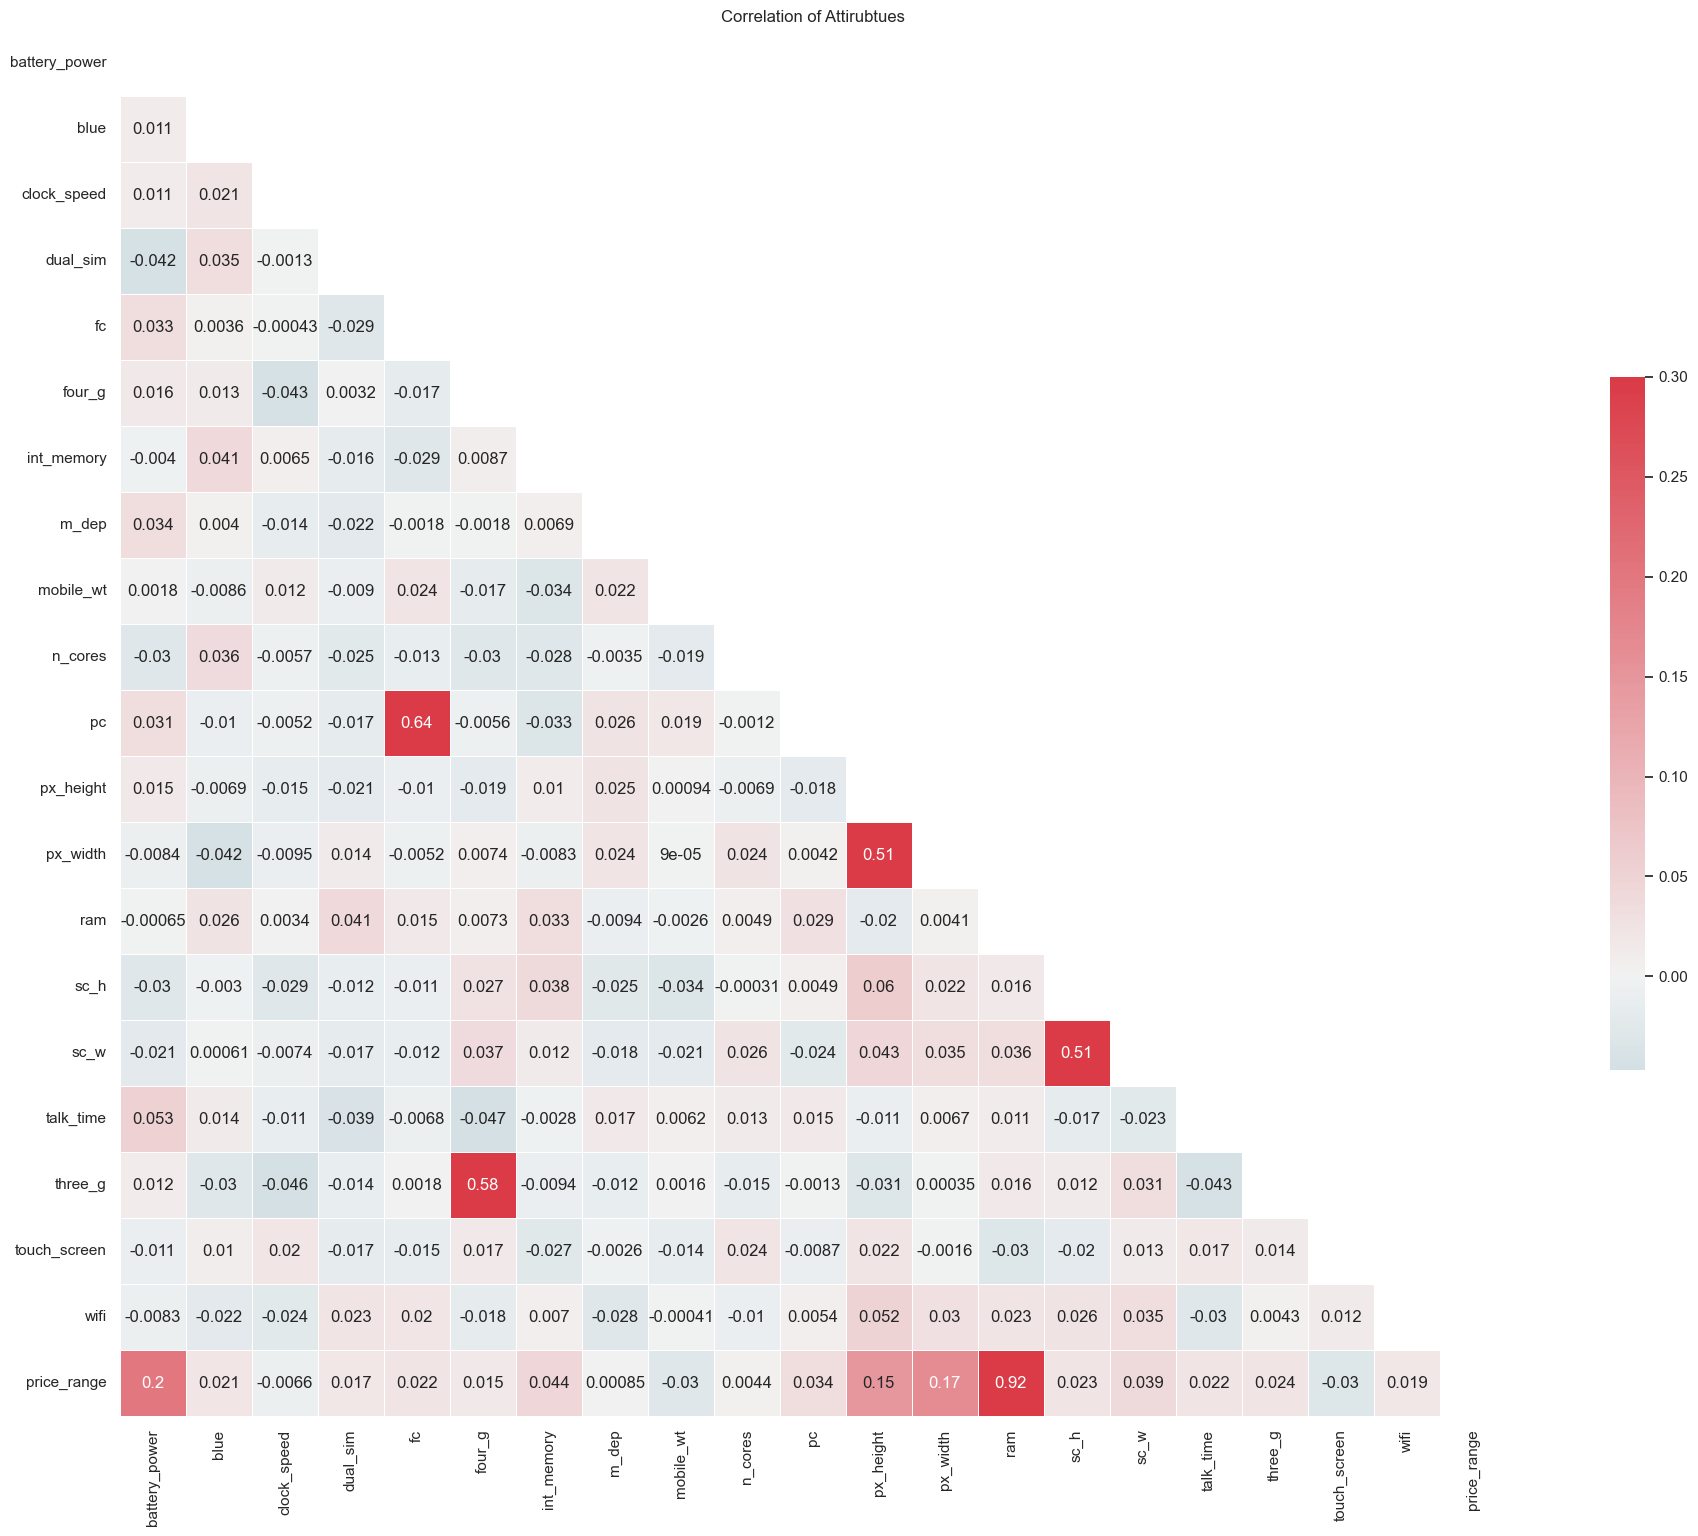

In [18]:
# Compute the correlation matrix
sns.set(style="white")
corr = train_data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, annot = True, vmax = .3, center = 0,square=True, linewidths = .5, cbar_kws = {"shrink": .5})
plt.title("Correlation of Attirubtues")

### We can conclude that there are high positive correlation with each of the following two feature columns:
##### 1 - px_width and px_height
##### 2 - sc_w and sc_h
##### 3 - three_g and four_g
##### 4 - pc and fc


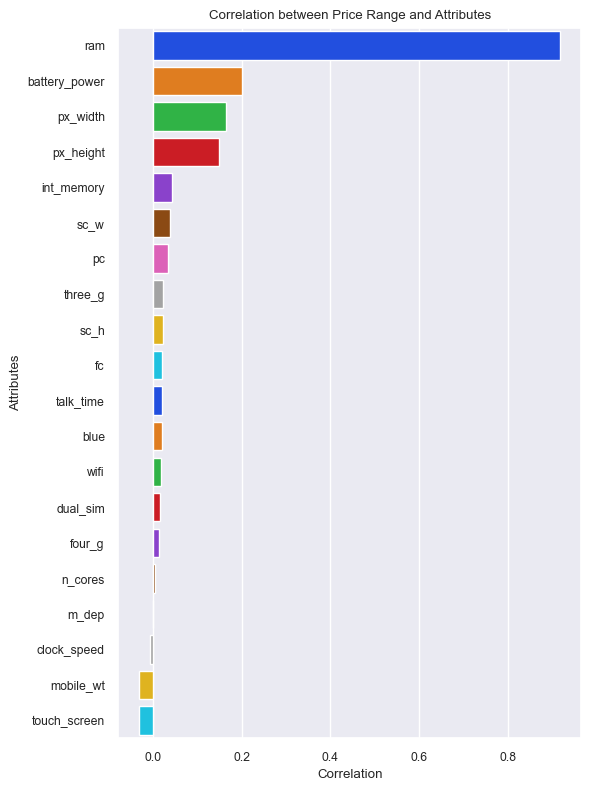

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending=False)[1:]

# Set the figure size and spacing
plt.figure(figsize=(6, 8))
sns.set(font_scale=0.8)

# Plot the horizontal bar chart
sns.barplot(x=cr, y=cr.index, palette="bright")

# Set the axis labels and title
plt.xlabel('Correlation')
plt.ylabel('Attributes')
plt.title('Correlation between Price Range and Attributes')

# Adjust the spacing between bars and prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Here we can see that there are high positive correlation with our target "price_range" column and "ram" column.

### After eliminating columns with high correlations, such as px_width, sc_w, three_g, and fc, the resulting models exhibited lower accuracies. This outcome is logical because collinearity primarily relates to linear relationships, removing highly correlated features can inadvertently remove non-linear relationships as well. If the relationship between the target variable and the removed features is non-linear, removing them might lead to a loss of predictive power so we'll make another step to decide which columns to remove.

In [20]:
variances = train_data.var()
sorted_variances = sorted(variances.items(), key=lambda x: x[1])

max_column_length = max(len(column) for column, _ in sorted_variances)

for column, variance in sorted_variances:
    formatted_column = column.ljust(max_column_length)
    print(f"{formatted_column} : {variance:.5f}")

m_dep         : 0.08318
three_g       : 0.18171
four_g        : 0.24966
dual_sim      : 0.25003
wifi          : 0.25008
blue          : 0.25010
touch_screen  : 0.25012
clock_speed   : 0.66586
price_range   : 1.25063
n_cores       : 5.23420
sc_h          : 17.75143
fc            : 18.84813
sc_w          : 18.97820
talk_time     : 29.85481
pc            : 36.77592
int_memory    : 329.26697
mobile_wt     : 1253.13557
px_width      : 186796.36194
battery_power : 193088.35984
px_height     : 196941.40804
ram           : 1176643.60643


In [21]:
train_data.drop(['four_g', 'dual_sim', 'wifi', 'blue', 'touch_screen', 'clock_speed'], axis=1, inplace = True)

### After computing the variance of each column, we removed columns that exhibited both low variance and low correlation with the target column.

In [22]:
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']
X_test = test_data

In [23]:
# Splitting the train dataset
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)

In [24]:
print("X_train shape :", x_train.shape)
print("x_valid shape :", x_valid.shape)
print("y_train shape :", y_train.shape)
print("y_valid shape :", y_valid.shape)

X_train shape : (1600, 14)
x_valid shape : (400, 14)
y_train shape : (1600,)
y_valid shape : (400,)


#### When working with our dataset, which contains columns with varying scales, and applying distance-based algorithms such as KNN and SVM, it is important to apply feature scaling. We apply standardization, where the mean of the feature is set to zero and the standard deviation is set to one. This ensures that all features contribute equally to the distance calculations and prevents any single feature from dominating due to differences in scale.

#### Additionally, scaling the numerical columns benefits gradient-based optimization algorithms by improving their convergence speed and reliability. By placing features on a similar scale, the optimization process becomes more efficient, leading to enhanced model performance.

#### It's worth noting that tree-based algorithms, such as decision trees, random forests, and gradient boosting machines (GBMs), are not as sensitive to feature scaling. These algorithms make splits based on comparisons of individual features and do not rely on distances or magnitudes. While scaling the numerical columns generally does not harm the performance of tree-based algorithms, it may not have a significant impact on their results. Therefore, scaling is not strictly necessary for tree-based algorithms, but it can be applied if you want to have a consistent preprocessing pipeline for different types of models.

#### To summary the above, when using distance-based algorithms like KNN and SVM, it is crucial to apply feature scaling to ensure fair contributions from all features and prevent scale-related biases. Scaling also benefits gradient-based optimization algorithms by improving their convergence. However, for tree-based algorithms, scaling is generally not required, although it can still be applied for consistency across different model types.

In [25]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

## Fine tuning 

#### We performed hyperparameter tuning by experimenting with various values for criteria in decision trees, random forest, number of neighbors in KNN, and the kernel in SVM. After conducting this tuning process, we proceeded to train the model using the optimized hyperparameters on the training set.

In [659]:
# Create a Logistic Regression model
lr = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000)

# Fit the model to the training data
lr.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_lr = lr.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_lr = accuracy_score(y_valid, y_pred_lr)

# Generate a classification report
report_lr = classification_report(y_valid, y_pred_lr)

# Print the classification report
print(report_lr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.92      0.95      0.94       100
           2       0.95      0.92      0.93       100
           3       0.98      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [660]:
# Create a Decision Tree classifier
dtg = DecisionTreeClassifier(criterion="gini", random_state=101)

# Fit the model to the training data
dtg.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_dtg = dtg.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_dtg = accuracy_score(y_valid, y_pred_dtg)

# Generate a classification report
report_dtg = classification_report(y_valid, y_pred_dtg)

# Print the classification report
print(report_dtg)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       100
           1       0.77      0.88      0.82       100
           2       0.76      0.71      0.74       100
           3       0.85      0.85      0.85       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [661]:
# Create a Decision Tree classifier with entropy as the criterion
dte = DecisionTreeClassifier(criterion="entropy", random_state=101)

# Fit the model to the training data
dte.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_dte = dte.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_dte = accuracy_score(y_valid, y_pred_dte)

# Generate a classification report
report_dte = classification_report(y_valid, y_pred_dte)

# Print the classification report
print(report_dte)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.81      0.81      0.81       100
           2       0.76      0.75      0.75       100
           3       0.84      0.84      0.84       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [662]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=0, criterion='entropy')

# Fit the model to the training data
rf.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_rf = rf.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_rf = accuracy_score(y_valid, y_pred_rf)

# Generate a classification report
report_rf = classification_report(y_valid, y_pred_rf)

# Print the classification report
print(report_rf)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       100
           1       0.87      0.94      0.90       100
           2       0.90      0.88      0.89       100
           3       0.98      0.93      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [663]:
# Create a K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=58)

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_knn = knn.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_knn = accuracy_score(y_valid, y_pred_knn)

# Generate a classification report
report_knn = classification_report(y_valid, y_pred_knn)

# Print the classification report
print(report_knn)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.63      0.60      0.62       100
           2       0.64      0.70      0.67       100
           3       0.89      0.73      0.80       100

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.73      0.72      0.73       400



In [664]:
# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_nb = nb.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_nb = accuracy_score(y_valid, y_pred_nb)

# Generate a classification report
report_nb = classification_report(y_valid, y_pred_nb)

# Print the classification report
print(report_nb)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.77      0.82      0.80       100
           2       0.79      0.75      0.77       100
           3       0.88      0.90      0.89       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [665]:
# Create a Support Vector Machine (SVM) classifier with a linear kernel
svm = SVC(kernel='linear', random_state=0)

# Fit the model to the training data
svm.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_svm = svm.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_svm = accuracy_score(y_valid, y_pred_svm)

# Generate a classification report
report_svm = classification_report(y_valid, y_pred_svm)

# Print the classification report
print(report_svm)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.95      0.95      0.95       100
           2       0.95      0.97      0.96       100
           3       0.99      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [666]:
# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Fit the model to the training data
gbc.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_gbc = gbc.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_gbc = accuracy_score(y_valid, y_pred_gbc)

# Generate a classification report
report_gbc = classification_report(y_valid, y_pred_gbc)

# Print the classification report
print(report_gbc)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.90      0.95      0.93       100
           2       0.91      0.89      0.90       100
           3       0.94      0.93      0.93       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [667]:
# Create an XGBoost classifier
xgb = XGBClassifier()

# Fit the model to the training data
xgb.fit(x_train, y_train)

# Make predictions on the validation data
y_pred_xgb = xgb.predict(x_valid)

# Calculate the accuracy on the validation data
accuracy_xgb = accuracy_score(y_valid, y_pred_xgb)

# Generate a classification report
report_xgb = classification_report(y_valid, y_pred_xgb)

# Print the classification report
print(report_xgb)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       100
           1       0.87      0.91      0.89       100
           2       0.86      0.86      0.86       100
           3       0.97      0.89      0.93       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



# Ensemble Methods

In [668]:
# Define the individual classifiers
classifier1 = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
classifier2 = DecisionTreeClassifier(random_state=101)
classifier3 = DecisionTreeClassifier(criterion= "entropy",random_state=101)
classifier4 = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True)
classifier5 = KNeighborsClassifier(n_neighbors = 50)  
classifier6 = GaussianNB()
classifier7 = SVC(kernel = 'linear',random_state = 0)  
classifier8 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
classifier9 = XGBClassifier()

# Voting Ensemble
voting_classifier = VotingClassifier(
    estimators=[('lr', classifier1), ('dtg', classifier2), ('dte', classifier3), ('rf', classifier4), ('knn', classifier5), 
               ('nb', classifier6), ('svm', classifier7), ('gbc', classifier8), ('xgb', classifier9)],
    voting = 'hard' 
)

# Train the voting ensemble
voting_classifier.fit(x_train, y_train)

# Make predictions using the voting ensemble
voting_predictions = voting_classifier.predict(x_valid)

# Evaluation of the voting ensemble
voting_accuracy = accuracy_score(y_valid, voting_predictions)
voting_report = classification_report(y_valid, voting_predictions)
print("Voting Ensemble Report:\n", voting_report)

# Stacking Ensemble
stacking_classifier = StackingClassifier(
    estimators=[('lr', classifier1), ('dtg', classifier2), ('dte', classifier3), ('rf', classifier4), ('knn', classifier5), 
               ('nb', classifier6), ('svm', classifier7), ('gbc', classifier8), ('xgb', classifier9)],
    final_estimator = XGBClassifier() 
)

# Train the stacking ensemble
stacking_classifier.fit(x_train, y_train)

# Make predictions using the stacking ensemble
stacking_predictions = stacking_classifier.predict(x_valid)

# Evaluation of the stacking ensemble
stacking_accuracy = accuracy_score(y_valid, stacking_predictions)
stacking_report = classification_report(y_valid, stacking_predictions)
print("Stacking Ensemble Report:\n", stacking_report)

Voting Ensemble Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.91      0.96      0.94       100
           2       0.92      0.89      0.90       100
           3       0.96      0.94      0.95       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

Stacking Ensemble Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       100
           1       0.97      0.90      0.93       100
           2       0.96      0.95      0.95       100
           3       0.98      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [671]:
models = ['LR', 'DTG', 'DTE', 'RF', 'KNN', 'NB', 'SVM', 'GBC', 'XGB', 'ENSVOTE', 'ENSTACK']
acc_scores = [accuracy_lr, accuracy_dtg, accuracy_dte, accuracy_rf, accuracy_knn,
              accuracy_nb, accuracy_svm, accuracy_gbc, accuracy_xgb, voting_accuracy, stacking_accuracy]

# Combine models and accuracy scores into a list of tuples
model_scores = list(zip(models, acc_scores))

# Sort the list of tuples based on accuracy scores in descending order
sorted_model_scores = sorted(model_scores, key=lambda x: x[1], reverse=True)

# Loop over the sorted list and print the models and accuracy scores
print("Models\tAccuracy\n")
for model, score in sorted_model_scores:
    print(f"{model}\t{score}")

Models	Accuracy

SVM	0.9675
LR	0.9575
ENSTACK	0.9575
ENSVOTE	0.9425
GBC	0.93
RF	0.9275
XGB	0.9075
NB	0.84
DTG	0.83
DTE	0.825
KNN	0.725


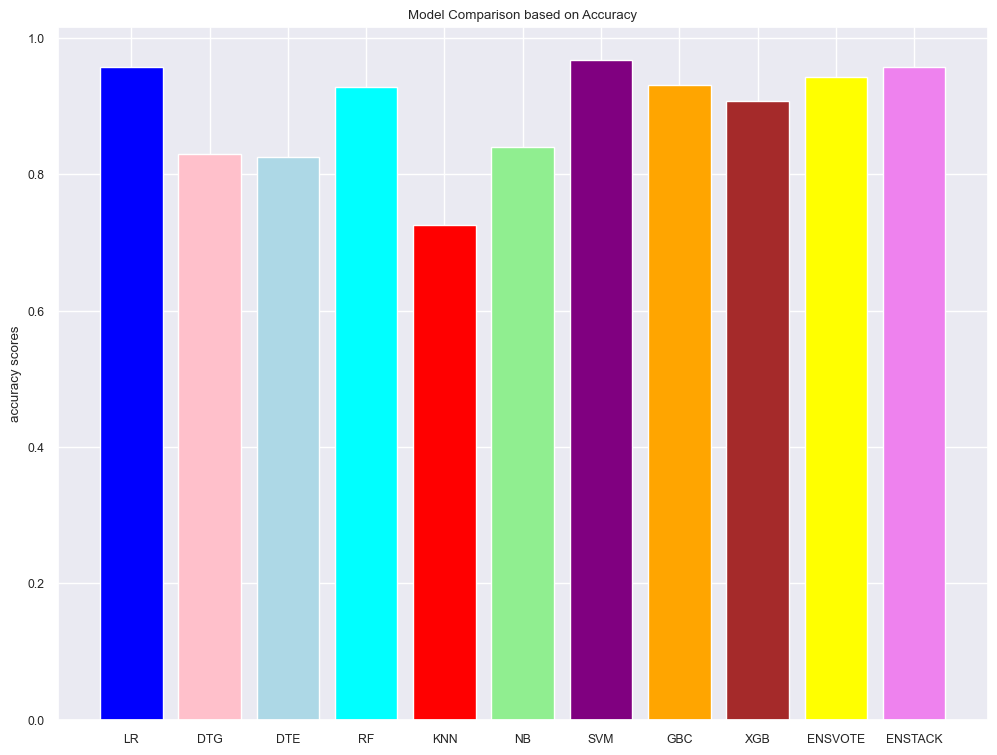

In [672]:
plt.rcParams['figure.figsize'] = (12,9)
plt.bar(models, acc_scores, color=['blue', 'pink', 'lightblue', 'cyan',
                                   'red','lightgreen','purple','orange','brown','yellow','violet'])
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

### So we found that SVM is the best model and as a common approach after hyperparameter tuning we used the whole train set for training 

### Pre-processing test set as train set 

In [766]:
X_test.drop(['id', 'four_g', 'dual_sim', 'wifi', 'blue', 'touch_screen', 'clock_speed'], axis=1, inplace = True)

### Standariziation

In [777]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

### Training models on whole train set

In [778]:
#Training logistic regression on the whole train set
lr.fit(X_train, y)

# Make predictions using the stacking ensemble
y_pred_lr_final = lr.predict(X_test)

In [779]:
#Training decision tree with gini criterion on the whole train set
dtg.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_dtg_final = dtg.predict(x_test)

In [780]:
#Training decision tree with entropy criterion on the whole train set
dte.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_dte_final = dte.predict(x_test)

In [781]:
#Training random forest on the whole train set
rf.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_rf_final = rf.predict(x_test)

In [782]:
#Training k nearest neighbor on the whole train set
knn.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_knn_final = knn.predict(x_test)

In [783]:
#Training naive bayes on the whole train set
nb.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_nb_final = nb.predict(x_test)

In [784]:
#Training SVM on the whole train set
svm.fit(X, y) 

# Make predictions using the stacking ensemble
y_pred_svm_final = svm.predict(x_test)

In [785]:
#Training gradient boost on the whole train set
gbc.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_gbc_final = gbc.predict(x_test)

In [786]:
#Training XGBoost on the whole train set
xgb.fit(X, y)

# Make predictions using the stacking ensemble
y_pred_xgb_final = xgb.predict(x_test)

In [787]:
# Train the voting ensemble
voting_classifier.fit(X, y)

# Make predictions using the voting ensemble
voting_predictions_final = voting_classifier.predict(x_test)

In [788]:
# Train the stacking ensemble
stacking_classifier.fit(X, y)

# Make predictions using the stacking ensemble
stacking_predictions_final = stacking_classifier.predict(x_test)

### Since our best model is SVM so we will save it as pickle file, also we'll save the predicted values in another file

In [789]:
# Save the SVM model
with open('SVM.pkl', 'wb') as file:
    pickle.dump(svm, file)
print("&& Model has been saved &&")

&& Model has been saved &&


In [790]:
# Save the predicted values
with open('y_predicted.pkl', 'wb') as file:
    pickle.dump(y_pred_svm_final, file)
print("&& File has been saved &&")

&& File has been saved &&
